In [6]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=load_iris()
X=data.data
y=data.target


In [8]:
df=pd.DataFrame(X,columns=data.feature_names)
print(df.head())
df['true_species']=y


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


K Means with K ==2==
Inertia: 222.36170496502308
Accuracy:0.5817500491982808
cluster centers:
 Cluster 0 : [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 Cluster 1 : [ 0.50728948 -0.42663134  0.65249366  0.62744675]


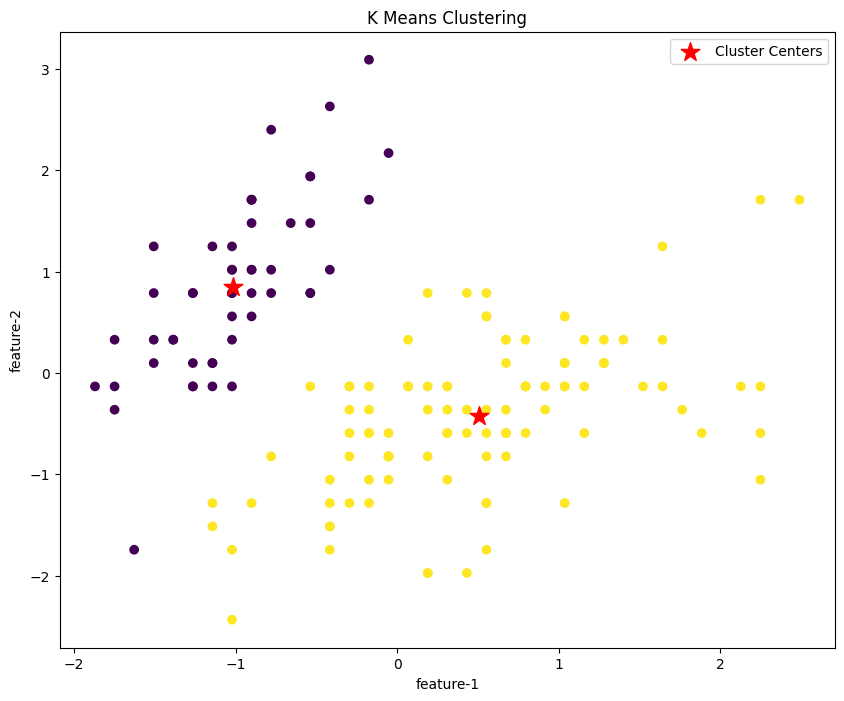

K Means with K ==3==
Inertia: 139.82049635974982
Accuracy:0.45994823920518635
cluster centers:
 Cluster 0 : [1.13597027 0.08842168 0.99615451 1.01752612]
 Cluster 1 : [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 Cluster 2 : [-0.05021989 -0.88337647  0.34773781  0.2815273 ]


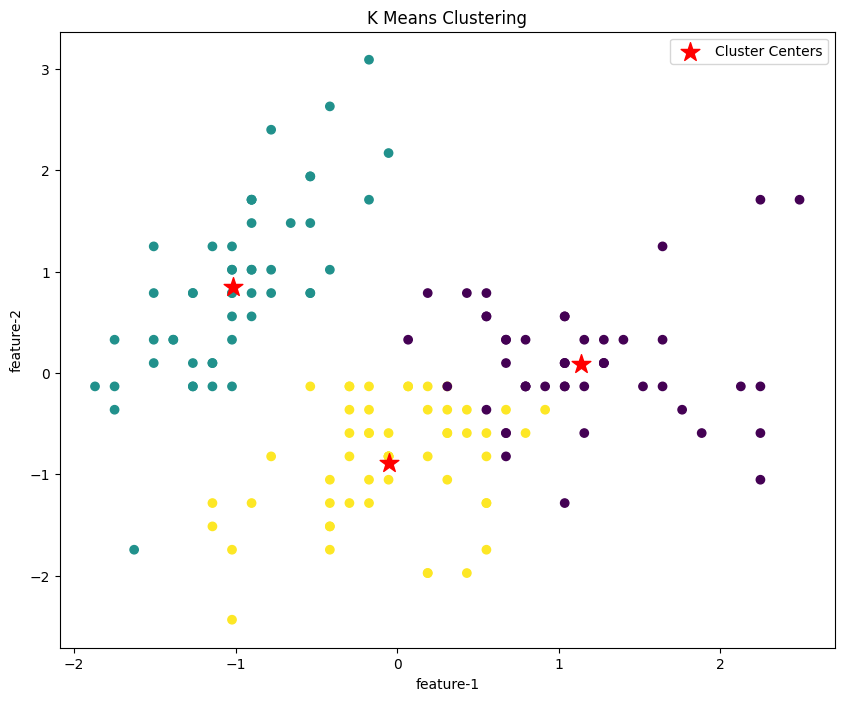

K Means with K ==4==
Inertia: 114.41256181896095
Accuracy:0.4188923398171004
cluster centers:
 Cluster 0 : [-1.00206653  0.90625492 -1.30310821 -1.25634413]
 Cluster 1 : [ 0.35704132 -0.39440379  0.58656225  0.54846743]
 Cluster 2 : [-0.42151732 -1.42945216  0.03937284 -0.05297198]
 Cluster 3 : [1.39733017 0.23316022 1.16062026 1.21734049]


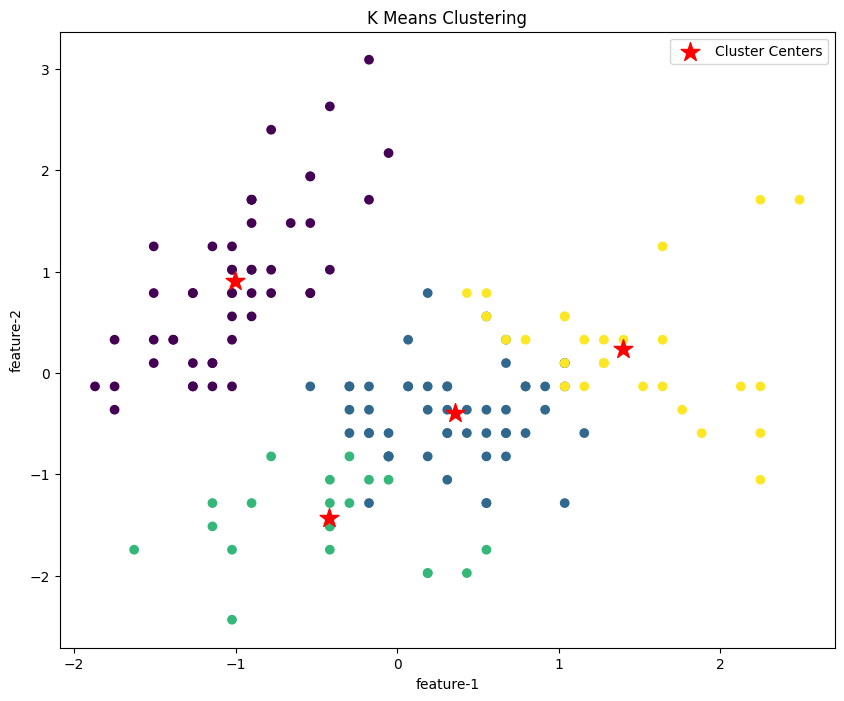

In [10]:
k_values=[2,3,4]
models={}
inertias=[]

for k in k_values:
    kmeans=KMeans(n_clusters=k)
    cluster_labels=kmeans.fit_predict(X_scaled)

    models[k]=kmeans
    inertias.append(kmeans.inertia_)
    sil_score=silhouette_score(X_scaled,cluster_labels)
    print(f"K Means with K =={k}==")
    print(f"Inertia: {kmeans.inertia_}")
    print(f"Accuracy:{sil_score}")
    print("cluster centers:")
    for i,center in enumerate(kmeans.cluster_centers_):
        print(f" Cluster {i} : {center}")
    plt.figure(figsize=(10,8))
    plt.title("K Means Clustering")
    scatter=plt.scatter(X_scaled[:,0],X_scaled[:,1],c=cluster_labels)
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',marker='*',label="Cluster Centers")
    plt.xlabel("feature-1")
    plt.ylabel("feature-2")
    plt.legend()
    plt.show()